In [1]:
import pyes
import elasticsearch
import datetime

es_address='140.118.155.14:9200'
conn = pyes.es.ES(es_address)
bq = pyes.query.BoolQuery() 

tq1 = pyes.query.TermQuery(field="text", value="cve")
tq2 = pyes.query.TermQuery(field="text", value="exploit")
tq3 = pyes.query.TermQuery(field="text", value="malware")
tq4 = pyes.query.TermQuery(field="text", value="attack")
tq5 = pyes.query.TermQuery(field="text", value="ddos")

ESR = pyes.ESRange(field="created_at_linux_timestamp", from_value="1388509200000", to_value="1419958800000", include_lower=True ,include_upper=False)
#2014-1-1 ~ 2014-12-31
rq = pyes.query.RangeQuery(qrange=ESR)

bq.add_should(tq1)
bq.add_should(tq2)
bq.add_should(tq3)
bq.add_should(tq4)
bq.add_should(tq5)
bq.add_must(rq)

result = conn.search(query=bq , indices='twitter2' , doc_types='tweet')

twitter=set()
calcMonth = [0,0,0,0,0,0,0,0,0,0,0,0]
twitterJan=set()
twitterFeb=set()
twitterMar=set()
twitterApr=set()
twitterMay=set()
twitterJun=set()
twitterJul=set()
twitterAug=set()
twitterSep=set()
twitterOct=set()
twitterNov=set()
twitterDec=set()

urlcount=0
nourlcount=0

print len(result)

for twi in result:
    twitter.add(twi['user']['id'])
    time = datetime.datetime.fromtimestamp(int(twi['created_at_linux_timestamp'])/1000).strftime('%Y-%m-%d %H:%M:%S')
    temp = time.split('-')[1]
    month = int(temp)
    calcMonth[month-1] = calcMonth[month-1]+1
    if month==1:
        twitterJan.add(twi['user']['id'])
    elif month==2:
        twitterFeb.add(twi['user']['id'])
    elif month==3:
        twitterMar.add(twi['user']['id'])
    elif month==4:
        twitterApr.add(twi['user']['id'])
    elif month==5:
        twitterMay.add(twi['user']['id'])
    elif month==6:
        twitterJun.add(twi['user']['id'])
    elif month==7:
        twitterJul.add(twi['user']['id'])
    elif month==8:
        twitterAug.add(twi['user']['id'])
    elif month==9:
        twitterSep.add(twi['user']['id'])
    elif month==10:
        twitterOct.add(twi['user']['id'])
    elif month==11:
        twitterNov.add(twi['user']['id'])
    elif month==12:
        twitterDec.add(twi['user']['id'])
    if((twi['text'].find("://"))>(-1)):
        urlcount = urlcount+1
    elif((twi['text'].find("://"))<0):
        nourlcount = nourlcount+1
     
calcTwitterMonth = [len(twitterJan),len(twitterFeb),len(twitterMar),len(twitterApr),len(twitterMay),len(twitterJun),len(twitterJul),len(twitterAug),len(twitterSep),len(twitterOct),len(twitterNov),len(twitterDec)]

print('2.a: Twitter',len(twitter))
print('2.b: Tweets',len(result))

4131
('2.a: Twitter', 92)
('2.b: Tweets', 4131)


In [2]:
from bokeh.charts import Bar, output_notebook, show
from bokeh.layouts import row

dataTwitter = {
    'Month': ['01_Jan', '02_Feb', '03_Mar', '04_Apr', '05_May', '06_Jun', '07_Jul', '08_Aug', '09_Sep', '10_Oct', '11_Nov', '12_Dec'],  
    'Times': calcTwitterMonth                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
}

dataTweets = {
    'Month': ['01_Jan', '02_Feb', '03_Mar', '04_Apr', '05_May', '06_Jun', '07_Jul', '08_Aug', '09_Sep', '10_Oct', '11_Nov', '12_Dec'],  
    'Times': calcMonth                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
}

barTwitter = Bar(dataTwitter, values='Times', label=['Month'], title="2.c: Twitter", plot_width=780)
dataTweets = Bar(dataTweets, values='Times', label=['Month'], title="2.d: Tweets", plot_width=780)

print('calcTwitterMonth',calcTwitterMonth)
print('calcTweetMonth',calcMonth)

output_notebook()
show(barTwitter)
show(dataTweets)

('calcTwitterMonth', [43, 52, 46, 51, 48, 56, 58, 57, 62, 71, 65, 66])
('calcTweetMonth', [318, 344, 291, 288, 203, 305, 360, 280, 392, 457, 416, 477])


Loading BokehJS ...

In [3]:
print ('w/ URL', urlcount)
print ('w/o URL', nourlcount)
from bokeh.charts import Donut, show, output_notebook

dataUrl = {
    'sample': ['w/ URL:\n'+str(urlcount), 'w/o URL:\n'+str(nourlcount)],
    'times': [urlcount, nourlcount]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
}

d = Donut(dataUrl, label=['sample'], values='times', title="2.e: w/ URL & w/o URL", text_font_size='20pt')

output_notebook()
show(d)

('w/ URL', 3254)
('w/o URL', 877)


Loading BokehJS ...

In [4]:
bqf = pyes.query.BoolQuery() 

tqf = pyes.query.TermQuery(field="text", value="cve")

ESRf = pyes.ESRange(field="created_at_linux_timestamp", from_value="1388509200000", to_value="1419958800000", include_lower=True ,include_upper=False)
#2014-1-1 ~ 2014-12-31
rqf = pyes.query.RangeQuery(qrange=ESRf)

bqf.add_should(tqf)
bqf.add_must(rqf)

resultf = conn.search(query=bqf , indices='twitter2' , doc_types='tweet')

Janf = dict()
Febf = dict()
Marf = dict()
Aprf = dict()
Mayf = dict()
Junf = dict()
Julf = dict()
Augf = dict()
Sepf = dict()
Octf = dict()
Novf = dict()
Decf = dict()

for twif in resultf:
    timef = datetime.datetime.fromtimestamp(int(twif['created_at_linux_timestamp'])/1000).strftime('%Y-%m-%d %H:%M:%S')
    tempf = timef.split('-')[1]
    monthf = int(tempf)
    if monthf==1:
        if twif['user']['id'] in Janf:
            Janf[twif['user']['id']] = Janf[twif['user']['id']] +1
        else:
            Janf[twif['user']['id']] = 1
    elif monthf==2:
        if twif['user']['id'] in Febf:
            Febf[twif['user']['id']] = Febf[twif['user']['id']] +1
        else:
            Febf[twif['user']['id']] = 1
    elif monthf==3:
        if twif['user']['id'] in Marf:
            Marf[twif['user']['id']] = Marf[twif['user']['id']] +1
        else:
            Marf[twif['user']['id']] = 1
    elif monthf==4:
        if twif['user']['id'] in Aprf:
            Aprf[twif['user']['id']] = Aprf[twif['user']['id']] +1
        else:
            Aprf[twif['user']['id']] = 1
    elif monthf==5:
        if twif['user']['id'] in Mayf:
            Mayf[twif['user']['id']] = Mayf[twif['user']['id']] +1
        else:
            Mayf[twif['user']['id']] = 1
    elif monthf==6:
        if twif['user']['id'] in Junf:
            Junf[twif['user']['id']] = Junf[twif['user']['id']] +1
        else:
            Junf[twif['user']['id']] = 1
    elif monthf==7:
        if twif['user']['id'] in Julf:
            Julf[twif['user']['id']] = Julf[twif['user']['id']] +1
        else:
            Julf[twif['user']['id']] = 1
    elif monthf==8:
        if twif['user']['id'] in Augf:
            Augf[twif['user']['id']] = Augf[twif['user']['id']] +1
        else:
            Augf[twif['user']['id']] = 1
    elif monthf==9:
        if twif['user']['id'] in Sepf:
            Sepf[twif['user']['id']] = Sepf[twif['user']['id']] +1
        else:
            Sepf[twif['user']['id']] = 1
    elif monthf==10:
        if twif['user']['id'] in Octf:
            Octf[twif['user']['id']] = Octf[twif['user']['id']] +1
        else:
            Octf[twif['user']['id']] = 1
    elif monthf==11:
        if twif['user']['id'] in Novf:
            Novf[twif['user']['id']] = Novf[twif['user']['id']] +1
        else:
            Novf[twif['user']['id']] = 1
    elif monthf==12:
        if twif['user']['id'] in Decf:
            Decf[twif['user']['id']] = Decf[twif['user']['id']] +1
        else:
            Decf[twif['user']['id']] = 1
    
            
print Janf
print Novf

{18783289: 2, 43130563: 1, 15655289: 2}
{43130563: 5, 18789893: 1, 41260072: 4, 97450156: 1, 118059149: 8, 15581551: 1, 15589731: 2, 23566038: 3, 15655289: 1, 18252252: 1}


In [5]:
from bokeh.charts import BoxPlot, output_notebook, show
from bokeh.layouts import row
from bokeh.sampledata.autompg import autompg as df

timesList = list()
monthList = list()

for tempftimes in Janf.itervalues():
    timesList.append(tempftimes)
    monthList.append('01_Jan')
for tempftimes in Febf.itervalues():
    timesList.append(tempftimes)
    monthList.append('02_Feb')
for tempftimes in Marf.itervalues():
    timesList.append(tempftimes)
    monthList.append('03_Mar')
for tempftimes in Aprf.itervalues():
    timesList.append(tempftimes)
    monthList.append('04_Apr')
for tempftimes in Mayf.itervalues():
    timesList.append(tempftimes)
    monthList.append('05_May')
for tempftimes in Junf.itervalues():
    timesList.append(tempftimes)
    monthList.append('06_Jun')
for tempftimes in Julf.itervalues():
    timesList.append(tempftimes)
    monthList.append('07_Jul')
for tempftimes in Augf.itervalues():
    timesList.append(tempftimes)
    monthList.append('08_Aug')
for tempftimes in Sepf.itervalues():
    timesList.append(tempftimes)
    monthList.append('09_Sep')
for tempftimes in Octf.itervalues():
    timesList.append(tempftimes)
    monthList.append('10_Oct')
for tempftimes in Novf.itervalues():
    timesList.append(tempftimes)
    monthList.append('11_Nov')
for tempftimes in Decf.itervalues():
    timesList.append(tempftimes)
    monthList.append('12_Dec')

dataUrl = {
    'Month': monthList,
    'Times': timesList
}
boxf = BoxPlot(dataUrl, values='Times', label='Month', title="2.f: Every month CVE boxplot", plot_width=780)

output_notebook()
show(boxf)

Loading BokehJS ...

In [43]:
bqg = pyes.query.BoolQuery() 

tqg1 = pyes.query.TermQuery(field="text", value="cve")
tqg2 = pyes.query.TermQuery(field="text", value="exploit")
tqg3 = pyes.query.TermQuery(field="text", value="malware")
tqg4 = pyes.query.TermQuery(field="text", value="attack")
tqg5 = pyes.query.TermQuery(field="text", value="ddos")
tqg6 = pyes.query.TermQuery(field="text", value="vulnerability")

ESRg = pyes.ESRange(field="created_at_linux_timestamp", from_value="1388509200000", to_value="1419958800000", include_lower=True ,include_upper=False)
#2014-1-1 ~ 2014-12-31
rqg = pyes.query.RangeQuery(qrange=ESRg)

bqg.add_should(tqg1)
bqg.add_should(tqg2)
bqg.add_should(tqg3)
bqg.add_should(tqg4)
bqg.add_should(tqg5)
bqg.add_should(tqg6)
bqg.add_must(rqg)

resultg = conn.search(query=bqg , indices='twitter2' , doc_types='tweet')
totalg = dict()

print len(resultg)


4730


In [42]:
for twig in resultg:
    if twig['user']['id'] in totalg:
        totalg[twig['user']['id']] = totalg[twig['user']['id']] +1
    else:
        totalg[twig['user']['id']] = 1
        
print totalg

{17775619: 6, 18789893: 235, 297856522: 158, 21501463: 1, 8236572: 21, 40072739: 35, 41260072: 179, 15943215: 80, 18783289: 28, 7025212: 17, 19206209: 194, 14780493: 99, 1102: 14, 4905551: 3, 23791544: 2, 14174808: 5, 20492381: 25, 312383587: 29, 15637093: 12, 17604714: 23, 14415986: 15, 14803061: 5, 813697: 32, 302716548: 56, 17226373: 23, 57279114: 26, 18213516: 40, 118059149: 399, 810641: 61, 40713876: 2, 161038997: 131, 8917142: 11, 11791512: 203, 14090906: 138, 3247471: 25, 14669471: 64, 86064583: 61, 97450156: 17, 21650546: 15, 14666934: 35, 390189754: 38, 132778684: 26, 28494014: 2, 15270591: 3, 43130563: 154, 33658564: 24, 14118608: 4, 23566038: 70, 18476766: 72, 22790881: 87, 192976110: 4, 135907568: 38, 11687162: 85, 14181505: 83, 40706825: 29, 9956632: 7, 16935717: 58, 16730420: 59, 48443: 4, 17767238: 80, 263917895: 8, 198365324: 60, 15757132: 19, 38956896: 5, 15589731: 144, 100361060: 27, 39262054: 207, 14244412: 1, 18766698: 1, 15581551: 15, 15655289: 32, 51845510: 4, 130

In [11]:
print'2.g:\n'
print'可以,以2014年為例,一年中發資安相關(*1)的Tweets超過200則的人,則為資安弱點分析指標帳號'
print'以下為2014年的資安弱點分析指標帳號(User_ID,次數)\n'

for tempgID, tempgTimes in totalg.items():
    if tempgTimes > 200:
        print (tempgID,tempgTimes)

print '\n*1:資安相關所下的關鍵字為cve, exploit, malware, attack, ddos, vulnerability'

2.g:

可以,以2014年為例,一年中發資安相關(*1)的Tweets超過200則的人,則為資安弱點分析指標帳號
以下為2014年的資安弱點分析指標帳號(User_ID,次數)

(18789893, 235)
(118059149, 398)
(11791512, 203)
(39262054, 207)

*1:資安相關所下的關鍵字為cve, exploit, malware, attack, ddos, vulnerability


In [96]:
import numpy as np

Q3ID = [1878983, 11791512, 118059149, 39262054, 21501463, 14244412, 15637965, 18766698, 17767238, 14181505, 11687162, 22790881, 28494014, 18476766, 23566038, 3107271, 4070825, 15943215, 14669471, 13275122]

#2:雜誌, 新聞, 公司等
#1:有點資安知識的人
#0:一般人
Q3Label = [2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]

# F1:2014 tweets>200  F2:用OMG broken正常人用詞  F3:Must_mal Should_atk,vul  F4:2014 12<tweets<240平均一個月1~10篇  F5:FK,Damn等情緒字眼
Q3 = np.array([[1, 0, 1, 0, 1],
               [1, 0, 1, 0, 1],
               [1, 1, 1, 0, 0],
               [1, 1, 0, 0, 1],
               [0, 0, 0, 1, 1],
               [0, 0, 0, 1, 1],
               [0, 0, 0, 1, 0],
               [0, 0, 0, 1, 0],
               [0, 1, 1, 0, 0],
               [0, 1, 0, 0, 1],
               [0, 1, 0, 0, 1],
               [0, 1, 1, 0, 1],
               [0, 1, 0, 1, 0],
               [0, 0, 0, 0, 0],
               [0, 0, 1, 0, 1],
               [0, 1, 0, 0, 0],
               [0, 1, 0, 0, 1],
               [0, 1, 0, 0, 1],
               [0, 1, 0, 0, 1],
               [0, 1, 0, 0, 1]])

print Q3

[[1 0 1 0 1]
 [1 0 1 0 1]
 [1 1 1 0 0]
 [1 1 0 0 1]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 1 1 0 0]
 [0 1 0 0 1]
 [0 1 0 0 1]
 [0 1 1 0 1]
 [0 1 0 1 0]
 [0 0 0 0 0]
 [0 0 1 0 1]
 [0 1 0 0 0]
 [0 1 0 0 1]
 [0 1 0 0 1]
 [0 1 0 0 1]
 [0 1 0 0 1]]


In [97]:
from sklearn.cross_validation import train_test_split
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(Q3, Q3Label, train_size=0.75, random_state=1)

from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier()# Create the classifier
decision_tree_classifier.fit(training_inputs, training_classes)# Train the classifier on the training set
decision_tree_classifier.score(testing_inputs, testing_classes)# Validate the classifier on the testing set using classification accuracy

1.0

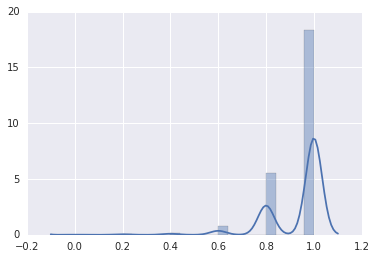

In [98]:
%matplotlib inline
import seaborn as sb

model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(Q3, Q3Label, train_size=0.75)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
sb.distplot(model_accuracies)

In [99]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4, 5]}

cross_validation = StratifiedKFold(Q3Label, n_folds=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(Q3, Q3Label)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.95
Best parameters: {'max_features': 4, 'max_depth': 2}


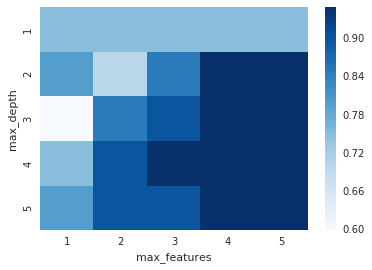

In [95]:
import matplotlib.pyplot as plt
grid_visualization = []

for grid_pair in grid_search.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)
    
grid_visualization = np.array(grid_visualization)
grid_visualization.shape = (5, 5)
sb.heatmap(grid_visualization, cmap='Blues')
plt.xticks(np.arange(5) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'][::-1])
plt.xlabel('max_features')
plt.ylabel('max_depth')